In [1]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from WholeBrain.Utils.p_values import plotComparisonAcrossLabels2

In [2]:
from ignition_common import *

************************* Subjects Info *************************
ID              FMRI_TR (ms)    TYPE                           VOLUME (cm³)    # REGIONS WITH TUMOR
sub-CON01       2100.0          none                           0.0             0              
sub-CON02       2100.0          none                           0.0             0              
sub-CON03       2100.0          none                           0.0             0              
sub-CON04       2100.0          none                           0.0             0              
sub-CON05       2400.0          none                           0.0             0              
sub-CON06       2400.0          none                           0.0             0              
sub-CON07       2400.0          none                           0.0             0              
sub-CON08       2400.0          none                           0.0             0              
sub-CON09       2400.0          none                           0.0        

Differences between groups.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. Glioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.884e-02 (ns) U_stat=9.100e+01
Control vs. Meningioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.664e-01 U_stat=9.400e+01


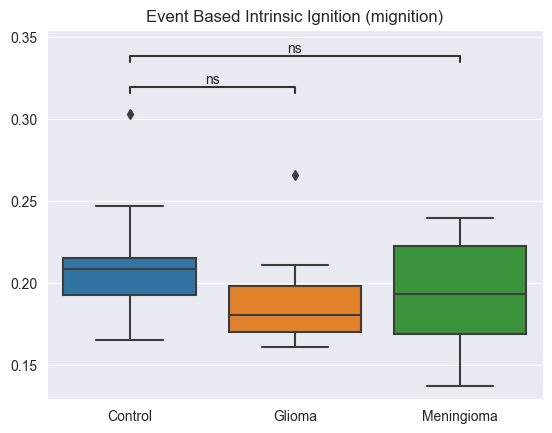

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. Glioma: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.884e-02 U_stat=9.100e+01
Control vs. >= 10cm³: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.296e-02 U_stat=1.220e+02


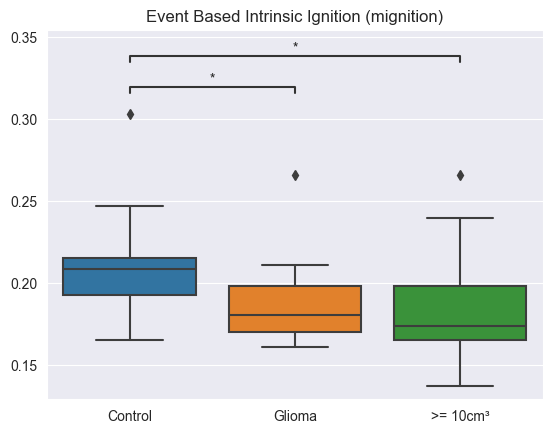

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. Patient: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.065e-01 U_stat=1.850e+02


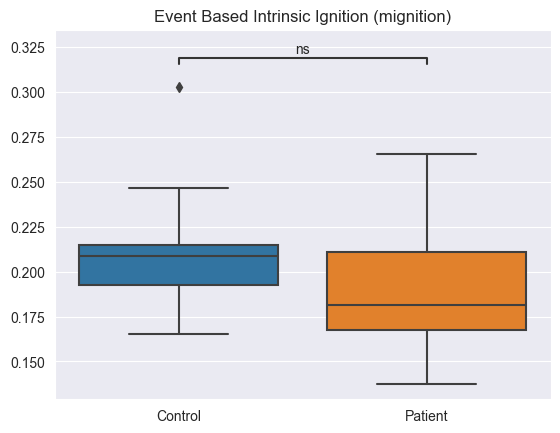

In [13]:
plotComparisonAcrossLabels2(
    {
        'Control': [v.mignition for k, v in subjects.get_control_subset().keep_only_from_this_set(ignitions).items()],
        'Glioma': [v.mignition for k, v in subjects.get_glioma_subset().keep_only_from_this_set(ignitions).items()],
        'Meningioma': [v.mignition for k, v in subjects.get_meningioma_subset().keep_only_from_this_set(ignitions).items()],
    },
    graphLabel='Event Based Intrinsic Ignition (mignition)',
    pairs=[('Control', 'Glioma'), ('Control', 'Meningioma')]
)

plotComparisonAcrossLabels2(
    {
        'Control': [v.mignition for k, v in subjects.get_control_subset().keep_only_from_this_set(ignitions).items()],
        'Glioma': [v.mignition for k, v in subjects.get_glioma_subset().keep_only_from_this_set(ignitions).items()],
        '>= 10cm³': [v.mignition for k, v in subjects.get_plus_x_cm3_subset(10.0).keep_only_from_this_set(ignitions).items()],
    },
    graphLabel='Event Based Intrinsic Ignition (mignition)',
    pairs=[('Control', 'Glioma'), ('Control', '>= 10cm³')]
)

plotComparisonAcrossLabels2(
    {
        'Control': [v.mignition for k, v in subjects.get_control_subset().keep_only_from_this_set(ignitions).items()],
        'Patient': [v.mignition for k, v in subjects.get_tumor_subset().keep_only_from_this_set(ignitions).items()],
    },
    graphLabel='Event Based Intrinsic Ignition (mignition)',
    pairs=[('Control', 'Patient')]
)

Now we plot ignition parameters (mean ignition, std ignition and fan factor) binning between tumor / non-tumor regions

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Tumor regions vs. Non Tumor Regions: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.161e-02 U_stat=8.777e+04


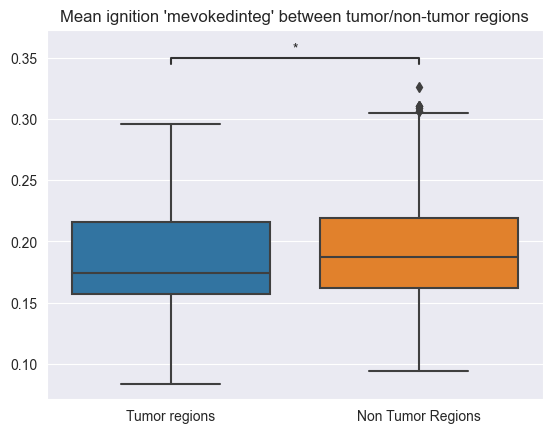

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Tumor regions vs. Non Tumor Regions: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.228e-02 U_stat=8.839e+04


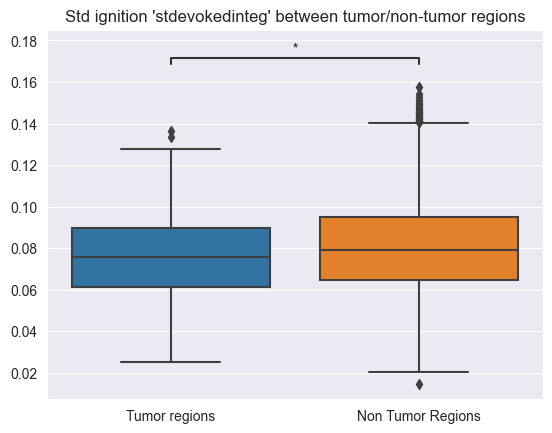

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Tumor regions vs. Non Tumor Regions: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.457e-01 U_stat=9.145e+04


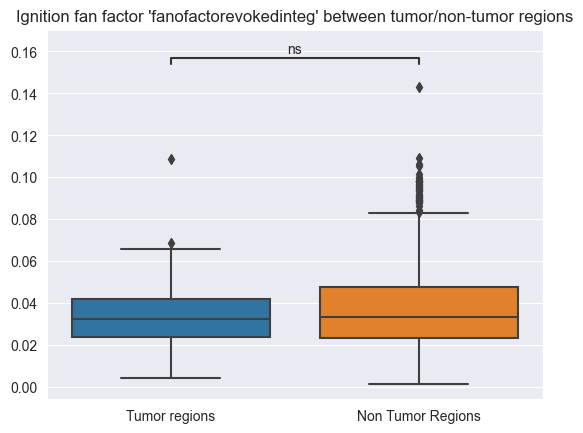

In [4]:
tumor_region_mean_ignition = []
non_tumor_region_mean_ignition = []
tumor_region_std_ignition = []
non_tumor_region_std_ignition = []
tumor_region_fanfact_ignition = []
non_tumor_region_fanfact_ignition = []

for k, s in tumor_subset.items():
    for i in range(68):
        if s.tumor_regions.is_tumor_region_by_id(i):
            tumor_region_mean_ignition.append(ignitions[k].mevokedinteg[i])
            tumor_region_std_ignition.append(ignitions[k].stdevokedinteg[i])
            tumor_region_fanfact_ignition.append(ignitions[k].fanofactorevokedinteg[i])
        else:
            non_tumor_region_mean_ignition.append(ignitions[k].mevokedinteg[i])
            non_tumor_region_std_ignition.append(ignitions[k].stdevokedinteg[i])
            non_tumor_region_fanfact_ignition.append(ignitions[k].fanofactorevokedinteg[i])

plotComparisonAcrossLabels2(
    {
        'Tumor regions': tumor_region_mean_ignition,
        'Non Tumor Regions': non_tumor_region_mean_ignition,
    },
    graphLabel="Mean ignition 'mevokedinteg' between tumor/non-tumor regions"
)

plotComparisonAcrossLabels2(
    {
        'Tumor regions': tumor_region_std_ignition,
        'Non Tumor Regions': non_tumor_region_std_ignition,
    },
    graphLabel="Std ignition 'stdevokedinteg' between tumor/non-tumor regions"
)

plotComparisonAcrossLabels2(
    {
        'Tumor regions': tumor_region_fanfact_ignition,
        'Non Tumor Regions': non_tumor_region_fanfact_ignition,
    },
    graphLabel="Ignition fan factor 'fanofactorevokedinteg' between tumor/non-tumor regions"
)

Before calculating the mean ignition, let's plot controls dispersion for each region. We seperate between left and right hemisphere for better readability.

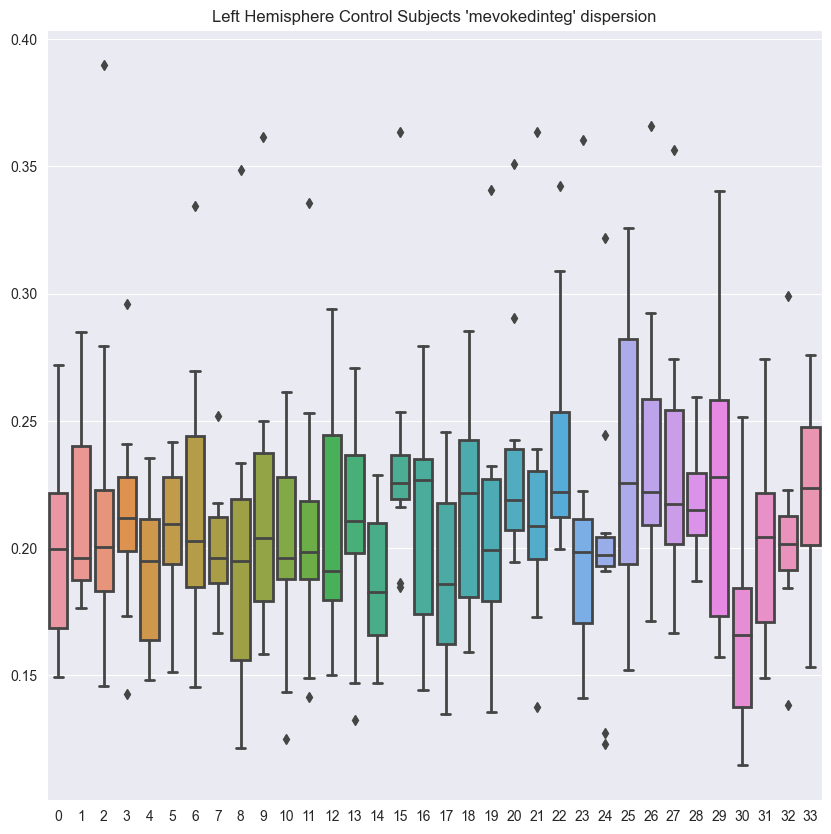

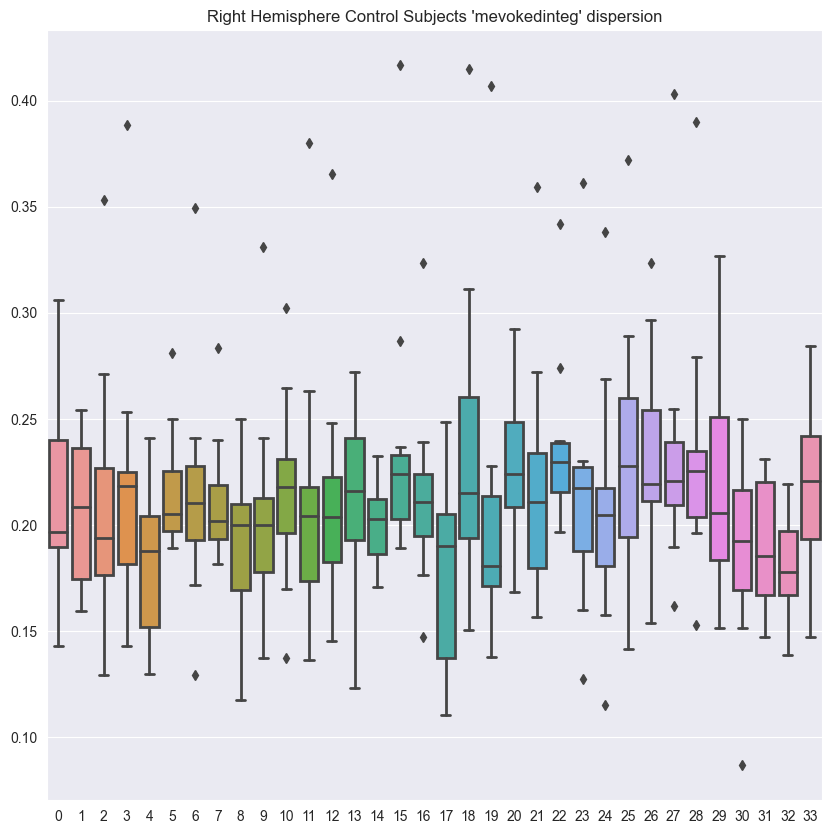

In [5]:
plt.figure(figsize=(10, 10))
seaborn.boxplot(
    data=pd.Series(
        data={str(i): [ignitions[k].mevokedinteg[i] for k, sub in control_subset.items()] for i in range(34)}
    ),
    linewidth=2.0
)
plt.title("Left Hemisphere Control Subjects 'mevokedinteg' dispersion")
plt.show()

plt.figure(figsize=(10, 10))
seaborn.boxplot(
    data=pd.Series(
        data={str(i): [ignitions[k].mevokedinteg[i] for k, sub in control_subset.items()] for i in range(34, 68)},
    ),
    linewidth=2.0
)
plt.title("Right Hemisphere Control Subjects 'mevokedinteg' dispersion")
plt.show()

Out of curiosity, let's see how different is control subjects 'mevokedinteg' between hemispheres...

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Left vs. Right: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.358e-01 U_stat=6.970e+04


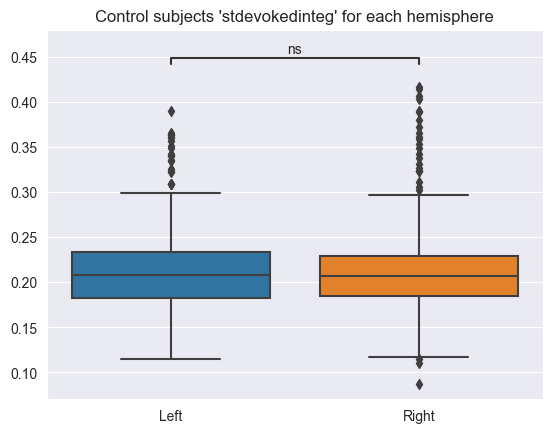

In [6]:
plotComparisonAcrossLabels2(
    {
        'Left': [ignitions[k].mevokedinteg[i] for k, _ in control_subset.items() for i in range(34)],
        'Right': [ignitions[k].mevokedinteg[i] for k, _ in control_subset.items() for i in range(34, 68)],
    },
    graphLabel="Control subjects 'stdevokedinteg' for each hemisphere"
)